In [730]:
import glob
import os

import numpy as np
import pandas as pd
import seaborn as sns

In [731]:
TRAIN_DIR = R"C:\Users\user\AppData\Roaming\Godot\app_userdata\GodotWebsocketServer\v2_gold_annotation"

In [732]:
TEST_DIR = R"C:\Users\user\AppData\Roaming\Godot\app_userdata\GodotWebsocketServer\v2_minx_annotation"

In [733]:
MOTION = "HIT"

# Build DataFrame

In [734]:
def build_df(_DIR):
    file_pattern = os.path.join(_DIR, "*.csv")
    csv_files = glob.glob(file_pattern)
    print(f"A total of {len(csv_files)} CSV files were used in constructing this DataFrame.")
    df = pd.concat(map(pd.read_csv, csv_files), ignore_index=True)
    return df

In [735]:
df_train = build_df(TRAIN_DIR)

A total of 16 CSV files were used in constructing this DataFrame.


In [736]:
df_test = build_df(TEST_DIR)

A total of 3 CSV files were used in constructing this DataFrame.


## Remove AHRS columns

In [737]:
df_train.drop(columns=df_train.filter(regex=r'^ahrs').columns, inplace=True)

In [738]:
df_test.drop(columns=df_test.filter(regex=r'^ahrs').columns, inplace=True)

# Keep values equal to 'X', change everything else to 'Y'

In [739]:
# df_train['motion_type'] = df_train['motion_type'].where(df_train['motion_type'] == f'{MOTION}', f'NOT_{MOTION}')

In [740]:
# df_test['motion_type'] = df_test['motion_type'].where(df_test['motion_type'] == f'{MOTION}', f'NOT_{MOTION}')

In [741]:
df_train.head()

,gyro_x_0,gyro_y_0,gyro_z_0,accel_x_0,accel_y_0,accel_z_0,mag_x_0,mag_y_0,mag_z_0,gyro_x_1,...,gyro_x_29,gyro_y_29,gyro_z_29,accel_x_29,accel_y_29,accel_z_29,mag_x_29,mag_y_29,mag_z_29,motion_type
0,-5.048313,0.544225,2.133175,4.55400,8.42100,-4.45695,24.187502,3.93750,-16.462502,-4.849900,...,6.140613,4.273912,-5.951687,7.384950,-4.68300,-1.177950,39.525002,-7.237500,-12.993751,HIT
1,0.511087,-0.001787,0.113850,7.98405,3.99495,-2.43300,49.050003,-3.86250,-7.481250,0.511087,...,5.875513,6.787962,-5.628287,8.638050,-4.89405,-6.553051,42.525002,-9.037500,-8.325001,HIT
2,0.689975,-0.069025,-0.549450,5.70405,7.45095,-2.50305,49.575001,0.86250,-6.918750,0.689975,...,3.287075,4.430663,-5.384225,7.177050,-5.79900,-4.045050,39.618752,-8.756250,-7.425000,HIT
3,-2.874850,-0.293012,-0.687638,5.19105,8.42805,-3.96105,41.568752,-11.28750,-12.468751,-2.874850,...,3.713600,1.932150,-4.427638,8.508000,-0.89205,-2.488050,39.075001,-9.862500,-11.943750,HIT
4,0.170775,0.027500,-0.111787,7.15005,3.16905,-0.74505,47.268753,-4.96875,-9.506250,0.170775,...,-10.236600,12.141250,2.020150,7.918951,-1.33005,-2.650950,39.000000,-9.431251,-11.400001,HIT


In [742]:
df_test.head()

,gyro_x_0,gyro_y_0,gyro_z_0,accel_x_0,accel_y_0,accel_z_0,mag_x_0,mag_y_0,mag_z_0,gyro_x_1,...,gyro_x_29,gyro_y_29,gyro_z_29,accel_x_29,accel_y_29,accel_z_29,mag_x_29,mag_y_29,mag_z_29,motion_type
0,0.409887,1.415975,-2.079412,8.563050,-2.071050,-1.65105,-8.118751,-20.118752,-21.506250,0.385962,...,-0.000137,-2.126987,0.906950,4.56495,-0.75900,0.18900,-9.131250,-21.487501,-20.700001,HIT
1,-0.295900,0.000137,-3.612813,7.692000,-2.653050,-1.11705,-9.543751,-21.356251,-21.075001,-0.263588,...,0.771375,-0.755013,0.283112,6.66195,-5.72205,-2.75505,-10.462501,-21.300001,-21.150002,HIT
2,0.395450,0.000000,-4.213412,9.190050,-4.951050,-3.00195,-8.681251,-21.187500,-21.375000,0.228525,...,1.046375,-1.387512,1.109900,6.42495,-2.86995,-0.91395,-8.737500,-21.187500,-21.318750,HIT
3,0.752125,1.352725,-2.407212,9.424951,-4.872000,-1.68705,-7.818750,-21.131250,-21.000000,0.000000,...,0.968825,-0.588775,1.654675,4.96695,-8.55900,-2.47500,-9.262501,-21.468750,-21.412500,HIT
4,-0.245713,-2.720988,-6.493712,5.953050,-7.197001,-4.53405,-11.268750,-21.412500,-21.206251,0.000000,...,-0.277200,-1.816512,-0.000137,4.59600,-7.55595,-2.51100,-13.462501,-21.618752,-20.643751,HIT


<Axes: xlabel='motion_type', ylabel='count'>

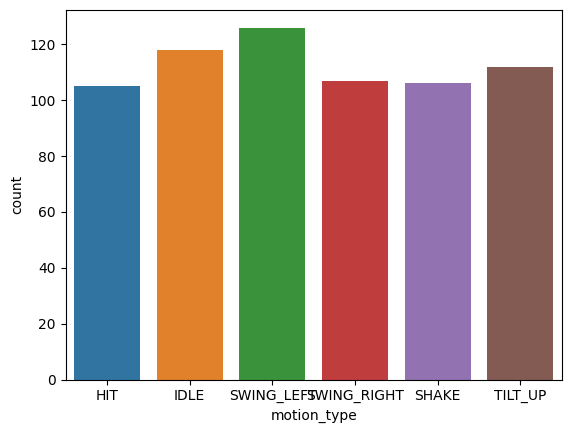

In [743]:
sns.countplot(df_train, x="motion_type", hue="motion_type")

In [744]:
len(df_train)

674

<Axes: xlabel='motion_type', ylabel='count'>

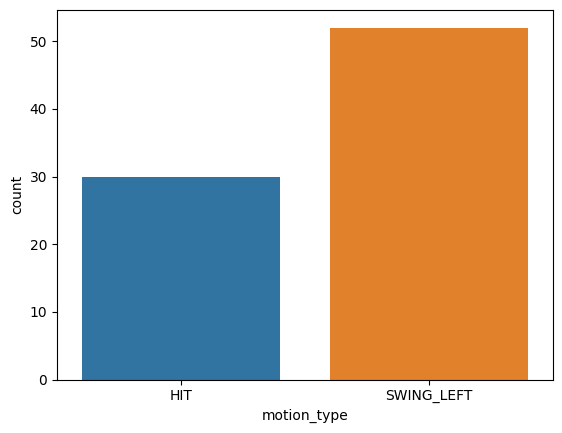

In [745]:
sns.countplot(df_test, x="motion_type", hue="motion_type")

In [746]:
len(df_test)

82

## Get X and y

In [747]:
from sklearn.preprocessing import LabelEncoder

In [748]:
def get_X_and_y(df: pd.DataFrame) -> tuple[np.array, np.array]:
    X_df = df.drop(columns=["motion_type"])
    y = df["motion_type"].values
    
    n_timesteps = 30
    channels = ["gyro_x", "gyro_y", "gyro_z", "accel_x", "accel_y", "accel_z", "mag_x", "mag_y", "mag_z"]
    n_channels = len(channels)

    X = np.zeros((len(df), n_channels, n_timesteps))

    for t in range(n_timesteps):
        for c, channel in enumerate(channels):
            col_name = f"{channel}_{t}"
            X[:, c, t] = X_df[col_name].values
            
    return X, y

In [749]:
X_train, y_train = get_X_and_y(df_train)
X_test, y_test = get_X_and_y(df_test)

In [750]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [751]:
le.classes_

array(['HIT', 'IDLE', 'SHAKE', 'SWING_LEFT', 'SWING_RIGHT', 'TILT_UP'],
      dtype=object)

In [752]:
from sktime.transformations.panel.rocket import MiniRocketMultivariate
from sklearn.linear_model import RidgeClassifier
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sktime.classification.deep_learning import InceptionTimeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [753]:
clf_minirocket = make_pipeline(
    MiniRocketMultivariate(random_state=42),
    StandardScaler(with_mean=False),
    RidgeClassifier(alpha=1.0)
)

In [754]:
# clf_minirocket = KNeighborsTimeSeriesClassifier(n_neighbors=1)

In [755]:
clf_minirocket.fit(X_train, y_train)

,steps,"[('minirocketmultivariate', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,False
,with_std,True
,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None


In [756]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [757]:
y_pred_train = clf_minirocket.predict(X_train)

In [758]:
print(accuracy_score(y_train, y_pred_train))
print(precision_score(y_train, y_pred_train, average="weighted"))
print(recall_score(y_train, y_pred_train, average="weighted"))
print(f1_score(y_train, y_pred_train, average="weighted"))

1.0
1.0
1.0
1.0


In [759]:
y_pred_test = clf_minirocket.predict(X_test)

In [760]:
print(accuracy_score(y_test, y_pred_test))
print(precision_score(y_test, y_pred_test, average="weighted"))
print(recall_score(y_test, y_pred_test, average="weighted"))
print(f1_score(y_test, y_pred_test, average="weighted"))

0.9634146341463414
1.0
0.9634146341463414
0.9807445442875481


c:\Users\user\Documents\Calvin\! Tugas Akhir\App\godot-websocket-server\onnx\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [761]:
print(confusion_matrix(y_test, y_pred_test))

[[27  1  0  2]
 [ 0  0  0  0]
 [ 0  0 52  0]
 [ 0  0  0  0]]
